In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,precision_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("onlinefraud.csv")

In [ ]:
df1=df.copy()

In [ ]:
df1.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087477 entries, 0 to 4087476
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 343.0+ MB


In [ ]:
#inspecting unique values of all the columns
df1.nunique()

step                  301
type                    5
amount            3594082
nameOrig          4083581
oldbalanceOrg     1268001
newbalanceOrig    1753771
nameDest          1746917
oldbalanceDest    2335119
newbalanceDest    2205047
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [ ]:
df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# Data Distribution
print(df1[['step', 'amount']].describe())

               step        amount
count  6.362620e+06  6.362620e+06
mean   2.433972e+02  1.798619e+05
std    1.423320e+02  6.038582e+05
min    1.000000e+00  0.000000e+00
25%    1.560000e+02  1.338957e+04
50%    2.390000e+02  7.487194e+04
75%    3.350000e+02  2.087215e+05
max    7.430000e+02  9.244552e+07


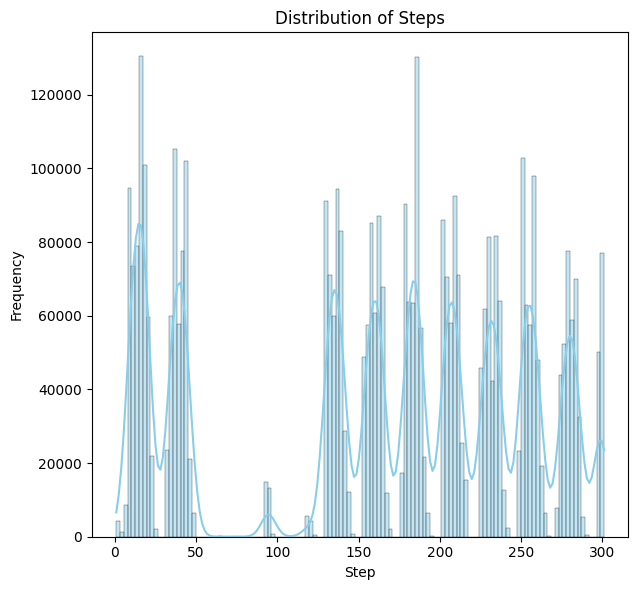

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))

# Histograms
plt.subplot(1, 2, 1)
sns.histplot(df1['step'], kde=True, color='skyblue')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.title('Distribution of Steps')

plt.tight_layout()
plt.show()

In [ ]:
fraud_counts=(df1['isFraud'].value_counts())
fraud_counts

0    6354407
1       8213
Name: isFraud, dtype: int64

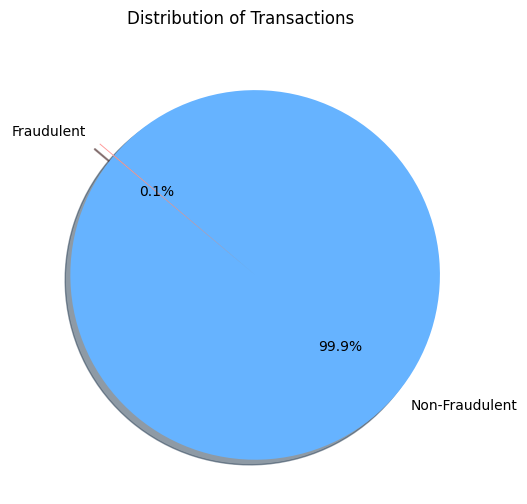

In [ ]:
# Data for pie chart
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = fraud_counts.values
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Non-Fraudulent')

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Transactions')
plt.show()

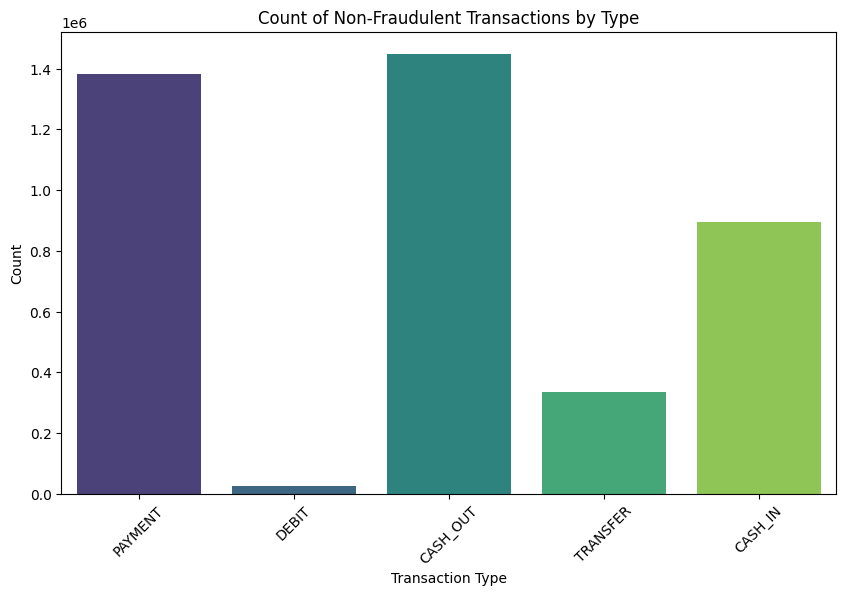

In [ ]:
# Assuming df1 is your DataFrame with 'type' and 'isFraud' columns
non_fraudulent_data = df1[df1['isFraud'] == 0]

plt.figure(figsize=(10, 6))
sns.countplot(data=non_fraudulent_data, x='type', palette='viridis')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Non-Fraudulent Transactions by Type')
plt.xticks(rotation=45)
plt.show()

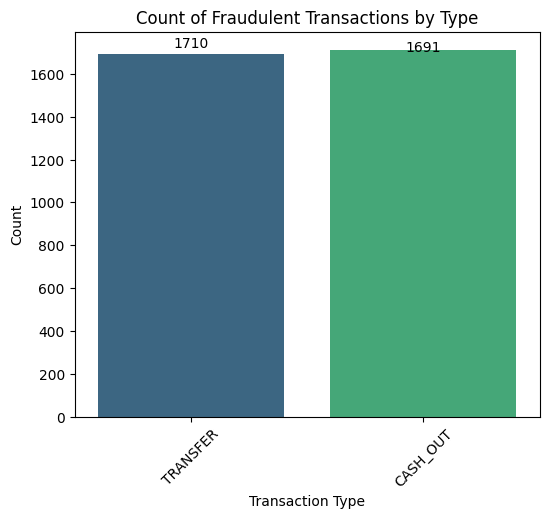

In [ ]:
# Assuming df1 is your DataFrame with 'type' and 'isFraud' columns
fraudulent_data = df1[df1['isFraud'] == 1]

plt.figure(figsize=(6, 5))
sns.countplot(data=fraudulent_data, x='type', palette='viridis')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions by Type')
plt.xticks(rotation=45)
# Annotate the count values on top of the bars
for index, value in enumerate(fraudulent_data['type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


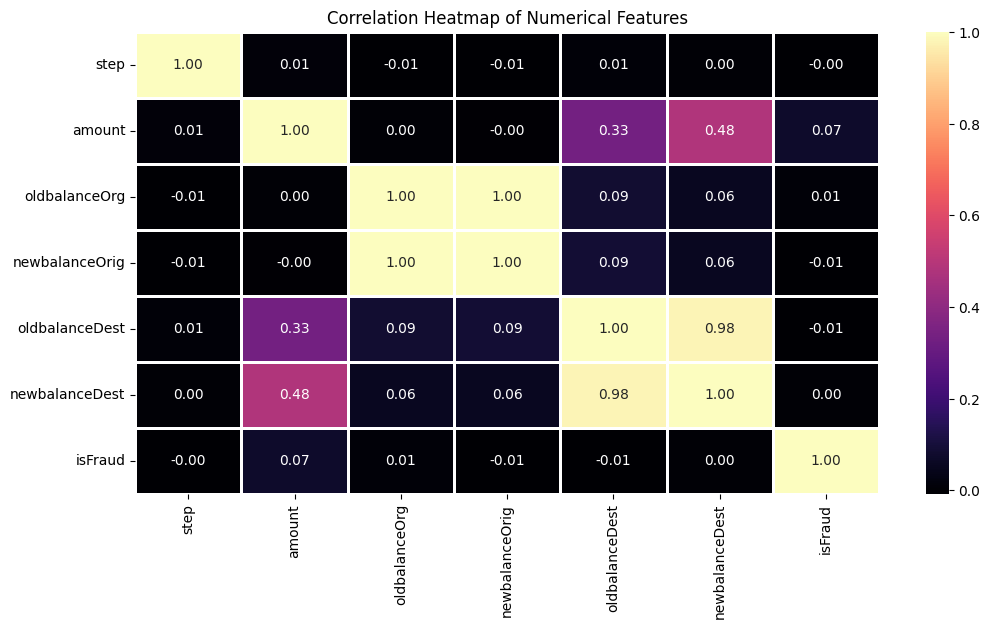

In [ ]:
# Assuming 'data' is your DataFrame containing numerical features
numeric_data = df1[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='magma',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
df1['isFraud'].isna().sum()

0

In [ ]:
df1.dropna(subset=['isFraud'], inplace = True)

In [ ]:
# Exclude categorical columns
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[numerical_features]  # Features
y = df['isFraud']  # Labels


In [ ]:
# Apply SMOTE to handle class imbalance
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to the data
X_resampled, y_resampled = undersampler.fit_resample(X, y)


In [ ]:
# Normalize features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
X_train

array([[ 0.1322109 , -0.43912606, -0.28281622, -0.08378208, -0.23856392,
        -0.32624157],
       [-0.71096943, -0.43254419, -0.37617053, -0.20990014, -0.16264522,
        -0.2528175 ],
       [-0.4730167 , -0.26454203, -0.27997326, -0.20990014, -0.23856392,
        -0.24029528],
       ...,
       [-1.49207513, -0.43838351, -0.37493462, -0.20395352, -0.21845479,
        -0.30594668],
       [-0.29713859, -0.30214233,  2.11642614,  3.1391579 , -0.12147938,
        -0.28850957],
       [ 1.97893101, -0.32023824, -0.31186465, -0.20990014, -0.2263151 ,
        -0.25609449]])

In [ ]:
X_test

array([[ 0.98056412, -0.03152406, -0.14654823, -0.20990014, -0.23856392,
        -0.32624157],
       [ 0.30291612, -0.42606339, -0.37245965, -0.20990014, -0.23856392,
        -0.32624157],
       [-0.02297566, -0.43265259, -0.36054623, -0.1895308 , -0.23856392,
        -0.32624157],
       ...,
       [-0.71096943,  0.0823598 , -0.08133886, -0.20990014, -0.23856392,
        -0.32624157],
       [-0.69027788,  4.17157929,  2.26012952, -0.20990014, -0.23856392,
        -0.32624157],
       [ 0.46327557, -0.31740193, -0.31024059, -0.20990014, -0.23856392,
        -0.32624157]])

In [ ]:
y_test.unique()

array([1, 0])

In [ ]:
value_counts = y_train.value_counts()

# Print the counts
print(value_counts)

1    5764
0    5734
Name: isFraud, dtype: int64


In [ ]:
y_train

1420     0
10126    1
10643    1
14059    1
15160    1
        ..
11284    1
11964    1
5390     0
860      0
15795    1
Name: isFraud, Length: 11498, dtype: int64

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
180/180 [==============================] - 9s 5ms/step - loss: 0.5507 - accuracy: 0.7333 - val_loss: 0.4424 - val_accuracy: 0.8066
Epoch 2/10
180/180 [==============================] - 1s 4ms/step - loss: 0.4397 - accuracy: 0.8065 - val_loss: 0.3877 - val_accuracy: 0.8302
Epoch 3/10
180/180 [==============================] - 1s 4ms/step - loss: 0.4046 - accuracy: 0.8257 - val_loss: 0.3610 - val_accuracy: 0.8464
Epoch 4/10
180/180 [==============================] - 1s 4ms/step - loss: 0.3682 - accuracy: 0.8415 - val_loss: 0.3290 - val_accuracy: 0.8586
Epoch 5/10
180/180 [==============================] - 1s 4ms/step - loss: 0.3431 - accuracy: 0.8569 - val_loss: 0.3028 - val_accuracy: 0.8649
Epoch 6/10
180/180 [==============================] - 1s 4ms/step - loss: 0.3109 - accuracy: 0.8697 - val_loss: 0.2691 - val_accuracy: 0.8862
Epoch 7/10
180/180 [==============================] - 1s 4ms/step - loss: 0.2836 - accuracy: 0.8835 - val_loss: 0.2560 - val_accuracy: 0.8884
Epoch 

In [ ]:
# Make predictions
y_prob = model.predict(X_test)
threshold = 0.3 # Adjust this threshold based on your requirements
y_pred = (y_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')




154/154 [==============================] - 0s 1ms/step
Accuracy: 0.91


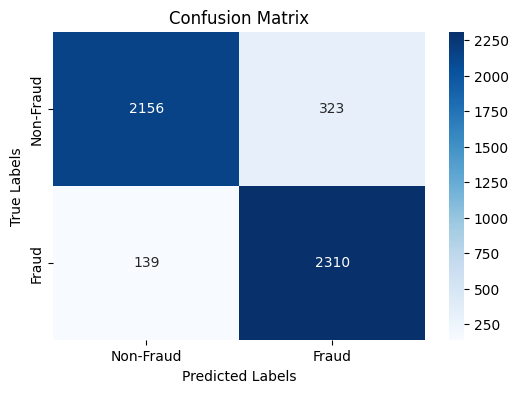

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate individual metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print individual metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Precision: 0.88
Recall: 0.94
F1-score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2479
           1       0.88      0.94      0.91      2449

    accuracy                           0.91      4928
   macro avg       0.91      0.91      0.91      4928
weighted avg       0.91      0.91      0.91      4928



In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define an MLP model with L1 and L2 regularization
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model with an optimizer, loss function, and metrics
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model with regularization
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
anomaly_scores = model1.predict(X_test)

# Define a threshold for anomaly detection
threshold = 0.5

# Detect anomalies
anomalies = (anomaly_scores > threshold)


Epoch 1/10
324/324 [==============================] - 3s 5ms/step - loss: 1.4986 - accuracy: 0.7319 - val_loss: 0.4017 - val_accuracy: 0.7435
Epoch 2/10
324/324 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.7325 - val_loss: 0.2605 - val_accuracy: 0.7461
Epoch 3/10
324/324 [==============================] - 1s 3ms/step - loss: 0.2414 - accuracy: 0.7431 - val_loss: 0.2316 - val_accuracy: 0.7496
Epoch 4/10
324/324 [==============================] - 1s 4ms/step - loss: 0.2204 - accuracy: 0.7572 - val_loss: 0.2131 - val_accuracy: 0.7765
Epoch 5/10
324/324 [==============================] - 1s 3ms/step - loss: 0.2071 - accuracy: 0.7775 - val_loss: 0.2048 - val_accuracy: 0.7913
Epoch 6/10
324/324 [==============================] - 1s 3ms/step - loss: 0.2011 - accuracy: 0.7876 - val_loss: 0.1990 - val_accuracy: 0.7913
Epoch 7/10
324/324 [==============================] - 1s 4ms/step - loss: 0.1966 - accuracy: 0.7944 - val_loss: 0.1962 - val_accuracy: 0.7974
Epoch 

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, anomalies)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate individual metrics
precision = precision_score(y_test, anomalies)
recall = recall_score(y_test, anomalies)
f1 = f1_score(y_test, anomalies)

# Print individual metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, anomalies))

Precision: 0.86
Recall: 0.73
F1-score: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      2479
           1       0.86      0.73      0.79      2449

    accuracy                           0.81      4928
   macro avg       0.81      0.81      0.81      4928
weighted avg       0.81      0.81      0.81      4928



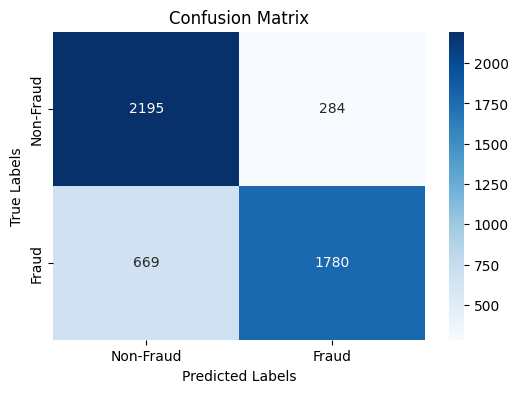

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, anomalies)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

# Define your base Keras model
def create_model():
    model2 = Sequential()
    model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model2.add(Dropout(0.3))
    model2.add(Dense(32, activation='relu'))
    model2.add(Dropout(0.3))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Custom wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model2 = None

    def fit(self, X, y):
        self.model2 = create_model()
        self.model2.fit(X, y, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return (self.model2.predict(X) > 0.5).astype(int)

# Create a BaggingClassifier with the custom wrapper
base_model = KerasClassifierWrapper()
bagging_classifier = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


154/154 [==============================] - 0s 2ms/step
Accuracy: 0.89


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate individual metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print individual metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Precision: 0.98
Recall: 0.79
F1-score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      2479
           1       0.98      0.79      0.87      2449

    accuracy                           0.89      4928
   macro avg       0.90      0.88      0.88      4928
weighted avg       0.90      0.89      0.88      4928

